In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/data/skin.zip', 'r')
zip_ref.extractall('/data')
zip_ref.close()

In [4]:
data_dir = '/data/IMG_CLASSES'

In [5]:
import os
Classes = os.listdir(data_dir)
print(Classes)

['8. Seborrheic Keratoses and other Benign Tumors - 1.8k', '6. Benign Keratosis-like Lesions (BKL) 2624', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '1. Eczema 1677', '2. Melanoma 15.75k', '5. Melanocytic Nevi (NV) - 7970', '10. Warts Molluscum and other Viral Infections - 2103', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k', '3. Atopic Dermatitis - 1.25k', '4. Basal Cell Carcinoma (BCC) 3323']


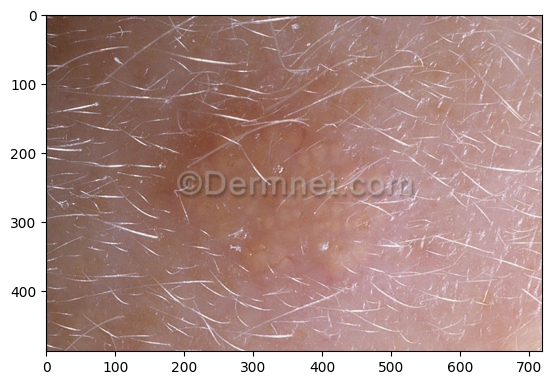

In [6]:
for category in Classes:
    path = os.path.join(data_dir, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb b = cv2.cvtColor(img_array, cv2. COLOR_GRAY2RGB)
        plt. imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

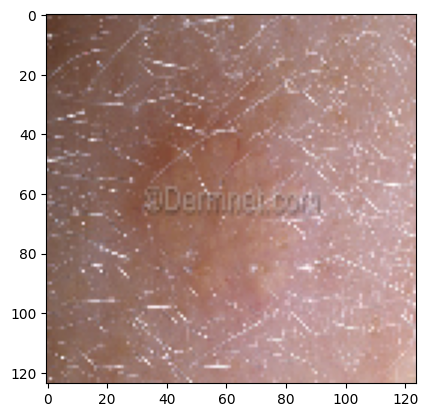

In [7]:
img_size= 124 ## ImageNet => 64 x 64
new_array= cv2.resize(img_array, (img_size, img_size))
plt. imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
new_array.shape

(124, 124, 3)

Reading all the images and storing in a array


In [9]:
training_Data = [] ## data array
 
def create_training_Data():
    for category in Classes:
        path = os.path.join(data_dir, category)
        class_num = Classes.index(category) ## 0 1, ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array= cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [10]:
create_training_Data()

In [11]:
print(len(training_Data))

27153


In [12]:
import random

random.shuffle(training_Data)

In [13]:
X = [] ## data /feature

y = [] ## Label

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) ## converting it to 4 dimension 

In [14]:
X.shape

(27153, 124, 124, 3)

In [ ]:
X = X/255.0

In [ ]:
y[0]

In [ ]:
Y = np.array(y)

In [ ]:
Y.shape

Deep Learning Model for training - Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNetV2() ## Pre-trained Model

In [ ]:
model.summary()

Transfer Learning 


In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

In [ ]:
final_output = layers.Dense(128)(base_output) ## adding new layer, after the output of global pooling layer
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)

In [ ]:
final_output

In [ ]:
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs = 15)